# Demographic and bias analysis
***
1. Pick a set of papers using keywords related to demographics and datasets.
    - Out of this selection, select 100 papers randomly for a little experiment

**Experiment**    
3. Annotation scheme with set of papers:
- paper title, paper_id, volume, purpose of paper (classification… or?), methods/models (CNNs, theory…?), number of datasets
- paper title, paper_id, volume, algorithm bias, data bias, measurement bias, technical bias (bias as a parameter)
- paper title, paper_id, volume, age, gender, gender as, race, race as, geolocation
- paper title, paper_id, geolocation as….

***


In [4]:
import os
import re
import pandas as pd
import numpy as np
from collections import Counter

### List of keywords and keyword-categories
***

In [5]:

# List of keywords used for sentence extractions and annotations
keywords_age        = ['age']

keywords_gender     = ['gender', 'sex', 'women', 'woman', 'female', 'male']

keywords_etnicity   = ['etnicity', 'etnicities', 'race', 'white patients', 'black patients']

keywords_geoloc     = ['geolocation', 'geographical', 'geographic', 'country', 'countries', 
                    'city', 'cities', 'hospital', 'hospitals', 'clinic', 'clinics', 'continent',
                    'province', 'state', 'region', 'town', 'village', 'area', 'district']

keywords_bias       = ['bias', 'biases','fairness']

In [6]:
categories = {
    'age': ['age'],

    'gender': ['gender', 'sex', 'women', 'woman', 'female', 'male'],

    'ethnicity': ['ethnicity', 'ethnicities', 'race', 'white patients', 'black patients'],

    'geolocation': ['geolocation', 'geographical', 'geographic', 'country', 'countries', 
                    'city', 'cities', 'hospital', 'hospitals', 'clinic', 'clinics', 'continent',
                    'province', 'state', 'region', 'town', 'village', 'area', 'district'],

    'patients': ['patient', 'patients'],

    'bias': ['bias', 'biases', 'fairness'],
}

In [7]:
# Unified keyword to category mapping including all themes
keywords_by_category = {
    'demographic_info': [
        'age', 'gender', 'sex', 'women', 'woman', 'female', 'male',
        'etnicity', 'etnicities', 'race', 'white patients', 'black patients'],
    'location_info': [
        'geolocation', 'geographical', 'geographic', 'country', 'countries', 
        'city', 'cities', 'hospital', 'hospitals', 'clinic', 'clinics', 'continent',
        'province', 'state', 'region', 'town', 'village', 'area', 'district'],
    'patient_info': ['patient', 'patients'],
    'bias_info': ['bias', 'biases', 'fairness'],
}

In [3]:
def load_data(filename):
    """
    Load the dataset from a CSV file.
    """
    return pd.read_csv(filename)

### **Scope of papers #1: Cancer-related medical AI's**
***

In [13]:
# Dataset with cancer-related papers and extract text
filename_cancer = '/Users/yasminsarkhosh/Documents/GitHub/machine-learning-bsc-thesis-2024/outputs/databases/cancer_related_papers_w_text.csv'
df_cancer_related = pd.read_csv(filename_cancer)
unique_titles_count = len(df_cancer_related['title'].unique())
print(f"Number of unique titles: {unique_titles_count}")
df_cancer_related.head()

Number of unique titles: 263


,title,header_no,header_title,text,volume
0,Anatomy-Driven Pathology Detection on Chest X-...,1.0,Introduction,chest radiographs (chest x-rays) represent the...,1
1,Anatomy-Driven Pathology Detection on Chest X-...,2.0,Related Work,weakly supervised pathology detection. due to ...,1
2,Anatomy-Driven Pathology Detection on Chest X-...,3.1,Model,figure 1 provides an overview of our method. g...,1
3,Anatomy-Driven Pathology Detection on Chest X-...,3.2,Inference,"during inference, the trained model predicts a...",1
4,Anatomy-Driven Pathology Detection on Chest X-...,3.3,Training,the anatomical region detector is trained usin...,1


### **Scope of papers #2: Cancer-related medical AI's wording 'patients' in their research articles**
***

As an experiment, I have narrowed down the 263 cancer-related medical AI's papers down to a scope of papers, working with datasets with a subgroup defined as 'patient/patients'. Mindful, that this code only selects papers by keyword-match.

The total number of papers are now down to 155.

***

In [9]:
# Dataset with cancer-patient related papers and extract text
filename_patients = '/Users/yasminsarkhosh/Documents/GitHub/machine-learning-bsc-thesis-2024/outputs/databases/papers_with_patients.csv'
df_cancer_related_patients = pd.read_csv(filename_patients, index_col=0)
unique_titles_count = len(df_cancer_related_patients['title'].unique())
print(f"Number of unique titles: {unique_titles_count}")
df_cancer_related_patients.head()

Number of unique titles: 155


,title,header_no,header_title,text,volume
5,Anatomy-Driven Pathology Detection on Chest X-...,3.4,Dataset,training dataset. we train on the chest imagen...,1
18,Self-supervised Learning for Physiologically-B...,2.4,Dataset,the dataset is composed of 23 oncological pati...,1
20,Self-supervised Learning for Physiologically-B...,0.0,(Color figure online),the most important design choice is the select...,1
21,Self-supervised Learning for Physiologically-B...,4.0,Discussion,even though the choice of the final activation...,1
32,AME-CAM: Attentive Multiple-Exit CAM for Weakl...,5.0,Conclusion,"in this work, we propose a brain tumor segment...",1


In [437]:
# Dataset with keyword counts from cancer-patient related papers
filename_keywords = '/Users/yasminsarkhosh/Documents/GitHub/machine-learning-bsc-thesis-2024/outputs/analysis/keywords_per_paper.csv'
df_keyword_counts = pd.read_csv(filename_keywords, index_col=0)
unique_titles_count = len(df_keyword_counts['title'].unique())
print(f"Number of unique titles: {unique_titles_count}")
df_keyword_counts.head()

Number of unique titles: 155


,age,gender,sex,women,woman,female,male,ethnicity,ethnicities,race,...,countries,city,cities,hospital,hospitals,clinic,clinics,bias,biases,title
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,Anatomy-Driven Pathology Detection on Chest X-...
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Self-supervised Learning for Physiologically-B...
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,AME-CAM: Attentive Multiple-Exit CAM for Weakl...
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,Weakly-Supervised Positional Contrastive Learn...
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,S 2 ME: Spatial-Spectral Mutual Teaching and E...


***
Experiment: Annotation scheme with set of papers
***

In [440]:
# Check if the number of unique titles is at least 50
unique_titles = df_cancer_related_patients['title'].nunique()
if unique_titles < 100:
    print(f"Warning: Only {unique_titles} unique papers found, less than 100.")

# Randomly select 50 unique titles
selected_titles = df_cancer_related_patients['title'].drop_duplicates().sample(n=min(100, unique_titles), random_state=32)

# Filter the original DataFrame to include only the selected titles
selected_papers_df = df_cancer_related_patients[df_cancer_related_patients['title'].isin(selected_titles)]

# You now have the selected_papers_df DataFrame with 50 randomly selected papers and their related rows
#selected_papers_df.to_csv('/Users/yasminsarkhosh/Documents/GitHub/machine-learning-bsc-thesis-2024/outputs/databases/50_selected_papers_2.csv')

Preprocessing
***

In [10]:
# Preprocessing: Consolidate texts by paper titles to analyze each paper as a whole.

# Grouping the DataFrame by 'title' and joining the text of the same paper into a single string
consolidated_df = df_cancer_related_patients.groupby('title').agg({
    'text': ' '.join
}).reset_index()

unique_titles_count = len(consolidated_df['title'].unique())
print(f"Number of unique titles: {unique_titles_count}")
# Preview the consolidated DataFrame to ensure the texts are combined correctly
consolidated_df.head()

Number of unique titles: 155


,title,text
0,3D Arterial Segmentation via Single 2D Project...,dataset. we use an in-house dataset of contras...
1,A Multi-task Network for Anatomy Identificatio...,a difficulty faced by surgeons performing endo...
2,A Texture Neural Network to Predict the Abnorm...,brachial plexopathy is a form of peripheral ne...
3,ALL-IN: A Local GLobal Graph-Based DIstillatio...,the examination of tissue and cells using micr...
4,AME-CAM: Attentive Multiple-Exit CAM for Weakl...,"in this work, we propose a brain tumor segment..."


In [11]:
import pandas as pd
import spacy

# Load spaCy English model
nlp = spacy.load("en_core_web_sm")

# Define keywords for each category
demographics_keywords = [
    'age', 'gender', 'sex', 'women', 'woman', 'female', 'male', 'ethnicity', 
    'ethnicities', 'race', 'white patients', 'black patients', 
    'geolocation', 'geographical', 'geographic', 'country', 'countries', 
    'city', 'cities', 'hospital', 'hospitals', 'clinic', 'clinics', 'continent',
    'province', 'state', 'region', 'town', 'village', 'area', 'district'
]
#bias_keywords = ['bias', 'biases', 'fairness']
dataset_keywords = ['dataset', 'datasets', 'data set', 'data sets', 'publicly', 'public', 'private', 'open access', 'open-access']

# Function to process text and count mentions
def count_mentions(text, nlp_model, demographics_keywords, bias_keywords, dataset_keywords):
    doc = nlp_model(text)
    demographic_mentions = sum(any(keyword in sent.text.lower() for keyword in demographics_keywords) for sent in doc.sents)
    bias_mentions = sum(any(keyword in sent.text.lower() for keyword in bias_keywords) for sent in doc.sents)
    dataset_mentions = sum(any(keyword in sent.text.lower() for keyword in dataset_keywords) for sent in doc.sents)
    return demographic_mentions, bias_mentions, dataset_mentions

# Apply the function to each row in the DataFrame
counts = consolidated_df['text'].apply(lambda x: count_mentions(x, nlp, demographics_keywords, bias_keywords, dataset_keywords))

# Split the counts into separate columns
consolidated_df[['demographics_count', 'bias_count', 'dataset_count']] = pd.DataFrame(counts.tolist(), index=consolidated_df.index)

unique_titles_count = len(consolidated_df['title'].unique())
print(f"Number of unique titles: {unique_titles_count}")
# Check the updated DataFrame structure
consolidated_df.head()


Number of unique titles: 155


,title,text,demographics_count,bias_count,dataset_count
0,3D Arterial Segmentation via Single 2D Project...,dataset. we use an in-house dataset of contras...,6,0,4
1,A Multi-task Network for Anatomy Identificatio...,a difficulty faced by surgeons performing endo...,10,0,0
2,A Texture Neural Network to Predict the Abnorm...,brachial plexopathy is a form of peripheral ne...,9,0,5
3,ALL-IN: A Local GLobal Graph-Based DIstillatio...,the examination of tissue and cells using micr...,20,0,7
4,AME-CAM: Attentive Multiple-Exit CAM for Weakl...,"in this work, we propose a brain tumor segment...",2,0,2


In [17]:
from email.mime import image
import pandas as pd
import spacy
from spacy.matcher import Matcher

# Load spaCy English model
nlp = spacy.load("en_core_web_sm")

# Define keywords for each category as patterns for whole word matching
demographics_patterns = [[{"LOWER": keyword}] for keyword in [
    'age', 'young', 'old', 'gender', 'sex', 'women', 'woman', 'female', 'male', 
    'ethnicity', 'ethnicities', 'race', 'white patients', 'black patients', 
]]

location_patterns = [[{"LOWER": keyword}] for keyword in ['geolocation', 'geographical', 'geographic', 'country', 'countries', 
                                                          'city', 'cities', 'hospital', 'hospitals', 'clinic', 'clinics', 'continent',
                                                          'province', 'state', 'region', 'town', 'village', 'district']]

dataset_patterns = [[{"LOWER": keyword}] for keyword in ['dataset', 'datasets', 'data set', 'data sets', 'publicly', 'public', 'private', 'open access', 'open-access']]

organs_patterms = [[{"LOWER": keyword}] for keyword in ['breast', 'no organ mentioned', 'gastro', 'colorectal', 'chest', 'skin', 'colon', 'lymph nodes', 'skin', 'prostate', 
                                                        'brain', 'kidney', 'liver', 'liver', 'brain', 'cerebral', 'lung', 'cells', 'whole body', 'lung', 'liver', 'spleen', 
                                                        'lung', 'liver', 'gallbladder', 'hepatic vein', 'spleen', 'stomach', 'pancreas', 'liver', 'spleen', 'kidney', 'pancreas', 
                                                        'abdomen', 'large bowel', 'duodenum', 'spinal cord', 'liver', 'spleen', 'small bowel', 'pancreas', 'left kidney', 'right kidney', 
                                                        'stomach', 'gallbladder', 'thorax', 'esophagus', 'trachea', 'left lung', 'right lung', 'heart', 'head', 'neck', 'brainstem', 
                                                        'mandible', 'optical chiasm', 'left optical nerve', 'right optical nerve', 'left parotid', 'right parotid', 'left submandibular gland', 
                                                        'right submandibular gland', 'brain', 'chest', 'pancreas', 'chest', 'head', 'abdomen', 'pelvis', 'colorectal', 'breast', 'colon tissue', 
                                                        'lung', 'breast', 'tissue', 'thyroid', 'chest', 'head', 'neck', 'brain']]

image_patterns = [[{"LOWER": keyword}] for keyword in   ['image', 'images', 'ct', 'cts', 'mri', 'wsis', 'wsi', 'ultrasound', 'pet', 'scan', 
                                                        'scans', 'x-ray', 'x-rays', 'xrays', 'gastroscopy', 'colonoscopy', 'endoscopy']]

# Initialize Matcher and add patterns
matcher = Matcher(nlp.vocab)
matcher.add("DEM", demographics_patterns)
matcher.add("LOC", location_patterns)
matcher.add("DATA", dataset_patterns)
matcher.add("ORGANS", organs_patterms)
matcher.add("IMAGES", image_patterns)


def collect_sentences(text, nlp_model, matcher):
    doc = nlp_model(text)
    sentences = {"DEM": set(), "LOC": set(), "DATA": set(), "ORGANS": set(),  "IMAGES": set()}
    
    for sent in doc.sents:
        sent_doc = nlp_model(sent.text)  # Process each sentence as a separate document
        matches = matcher(sent_doc)
        for match_id, start, end in matches:
            label = nlp_model.vocab.strings[match_id]
            sentences[label].add(sent.text)
    
    # Convert sets back to lists for further processing
    return [list(sentences["DEM"]), list(sentences["LOC"]), list(sentences["DATA"]), list(sentences['ORGANS']), list(sentences["IMAGES"])]

# Apply the function to each row in the DataFrame to collect sentences
sentence_collections = consolidated_df['text'].apply(lambda x: pd.Series(collect_sentences(x, nlp, matcher)))

# Expand the collected sentences into separate DataFrame columns
consolidated_df[['demographics_sentences', 'loc_sentences', 'dataset_sentences', 'organs_sentences', 'image_sentences']] = sentence_collections

# Optionally, calculate counts based on the lists of sentences
for category in ['demographics', 'loc', 'dataset', 'organs', 'image']:
    consolidated_df[f'{category}_count'] = consolidated_df[f'{category}_sentences'].apply(len)

unique_titles_count = len(consolidated_df['title'].unique())
print(f"Number of unique titles: {unique_titles_count}")
# Preview the updated DataFrame
consolidated_df.head()


Number of unique titles: 155


,title,text,demographics_count,bias_count,dataset_count,demographics_sentences,bias_sentences,dataset_sentences,image_sentences,image_count,organs_sentences,loc_sentences,loc_count,organs_count
0,3D Arterial Segmentation via Single 2D Project...,dataset. we use an in-house dataset of contras...,1,0,4,[the cohort consists of 141 patients with panc...,[],[we use an in-house dataset of contrast-enhanc...,[we use an in-house dataset of contrast-enhanc...,2,[in order to\nremove as much of the cluttering...,[given a 3d\narterial ct of the abdominal area...,1,1
1,A Multi-task Network for Anatomy Identificatio...,a difficulty faced by surgeons performing endo...,0,0,0,[],[],[],[the center of mass of each segmentation\nmask...,10,[],"[moreover, the area covered by these 8-structu...",2,0
2,A Texture Neural Network to Predict the Abnorm...,brachial plexopathy is a form of peripheral ne...,0,0,5,[],[],[the final dataset for radiomic analysis was\n...,[our research focuses on the brachial\nplexopa...,9,[our research focuses on the brachial\nplexopa...,"[in the past\nseveral decades, many state-of-t...",3,5
3,ALL-IN: A Local GLobal Graph-Based DIstillatio...,the examination of tissue and cells using micr...,0,0,7,[],[],"[however, the best baseline with vit still has...",[while prognostication and survival analysis o...,3,[radical therapy is considered\novertreatment ...,[this\ngroup should be managed differently fro...,1,10
4,AME-CAM: Attentive Multiple-Exit CAM for Weakl...,"in this work, we propose a brain tumor segment...",0,0,2,[],[],"[specifically, ame-cam achieves\nthe highest d...",[these\nresults indicate the effectiveness of ...,2,[these\nresults indicate the effectiveness of ...,[],0,2


In [18]:
#consolidated_df.to_csv('/Users/yasminsarkhosh/Documents/GitHub/machine-learning-bsc-thesis-2024/outputs/analysis/refined_consolidated_df_2.csv')

In [25]:
df = pd.read_csv('/Users/yasminsarkhosh/Documents/GitHub/machine-learning-bsc-thesis-2024/outputs/annotation_data/50_papers_annotations.csv', delimiter=';', header=0).fillna(0)

df.drop(columns=['purpose of paper', 'Kolonne1', 'methods','metrices', 'measurement bias', 'measurement bias2',
       'sentence for measurement bias', 'bias sentence','reasoning for measurement bias','sentence for bias as technical  term', 'reasoning for technical bias',
       'reasoning for data bias'], inplace=True)

# Convert the columns to integer type
convert_dtype = ['age', 'gender', 'ethnicity', 'geolocation', 'no. datasets', 'public  dataset(s)', 'private data(s)', 'sub type of data bias',	'technical bias']

for col in convert_dtype:
    df[col] = df[col].astype('int')

unique_titles_count = len(df['title'].unique())
print(f"Number of unique titles: {unique_titles_count}")
df = df[(df[['dataset info']] != 0).all(axis=1)]
df = df.reset_index(drop=True)
df.head()

#df.to_csv('/Users/yasminsarkhosh/Documents/GitHub/machine-learning-bsc-thesis-2024/outputs/annotation_data/df_50_papers_annotations.csv')

Number of unique titles: 50


,title,age,gender,ethnicity,geolocation,dataset info,no. datasets,public dataset(s),private data(s),image type,organ/body part,bias,algorithm bias,data bias,sub type of data bias,technical bias
0,A Texture Neural Network to Predict the Abnorm...,0,0,0,1,"following irb approval for this study, we sear...",1,0,0,"mri, roi masks",breast,0,0,0,0,0
1,An AI-Ready Multiplex Staining Dataset for Rep...,0,0,0,0,we release the first denovo mif/mihc stained d...,0,0,0,0,0,0,0,0,0,0
2,An Anti-biased TBSRTC-Category Aware Nuclei Se...,0,0,0,0,"image dataset.', 'we construct a clinical thyr...",0,0,0,0,0,1,0,0,0,1
3,atTRACTive: Semi-automatic White Matter Tract ...,0,0,0,0,the method is implemented as the tool attracti...,0,0,0,0,0,0,0,0,0,0
4,Automatic Bleeding Risk Rating System of Gastr...,0,0,0,1,this may cause inconsistency or even misdiagno...,1,1,0,"gastroscopy, endoscopy",gastro,0,0,0,0,0


In [169]:
# for value in df.iterrows():
#     if value == 0:
#         df['organ/body part'] = df['organ/body part'].replace(0,'no organ mentioned')
#         df['image type'] = df['image type'].replace(0,'no image type mentioned')

# df.head()

In [3]:
#df.to_csv('/Users/yasminsarkhosh/Documents/GitHub/machine-learning-bsc-thesis-2024/outputs/annotation_data/df_50_papers_annotations.csv')
df = pd.read_csv('/Users/yasminsarkhosh/Documents/GitHub/machine-learning-bsc-thesis-2024/outputs/annotation_data/df_50_papers_annotations.csv', index_col=0)
df.head()

NameError: name 'pd' is not defined

In [2]:
# Extract unique organs and image types
organs = (df['organ/body part'].unique()).tolist()

final = []
for value in organs:
    organ = value.split(",")
    organ = value.split(",")
    organ = [x.strip() for x in organ]
    final.append(tuple(organ))

# list of unique organs
unique_organs = [y for x in final for y in x]
print(unique_organs)

# Extract unique image types
image_types = (df['image type'].unique()).tolist()

final = []
for value in image_types:
    image_type = value.split(",")
    image_type = [x.strip() for x in image_type]
    final.append(tuple(image_type))

# list of unique image types
unique_image_types = [y for x in final for y in x]
print(unique_image_types)

NameError: name 'df' is not defined

In [332]:
organ_counts = df['organ/body part'].str.split(',').explode().str.strip().value_counts()
image_type_counts = df['image type'].str.split(',').explode().str.strip().value_counts()

<Axes: title={'center': 'Organ/Body Part Distribution'}>

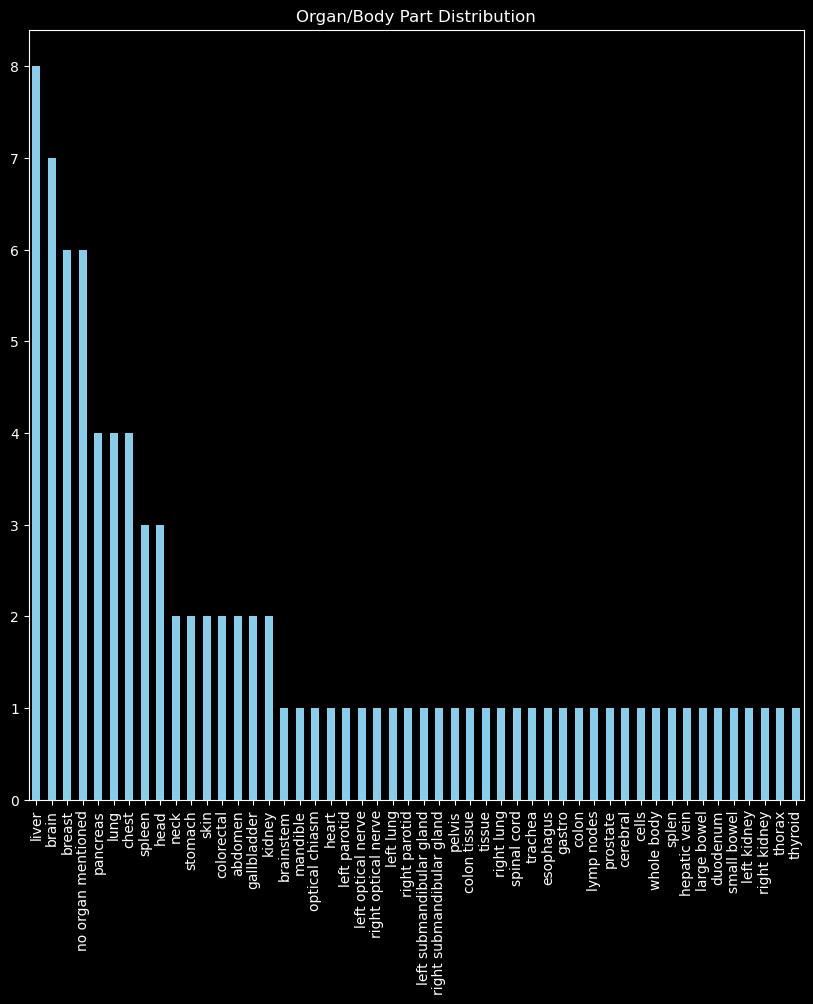

In [341]:
organ_counts.plot(kind='bar', figsize=(10, 10), color='skyblue', title='Organ/Body Part Distribution')

<Axes: title={'center': 'Image Types Distribution'}>

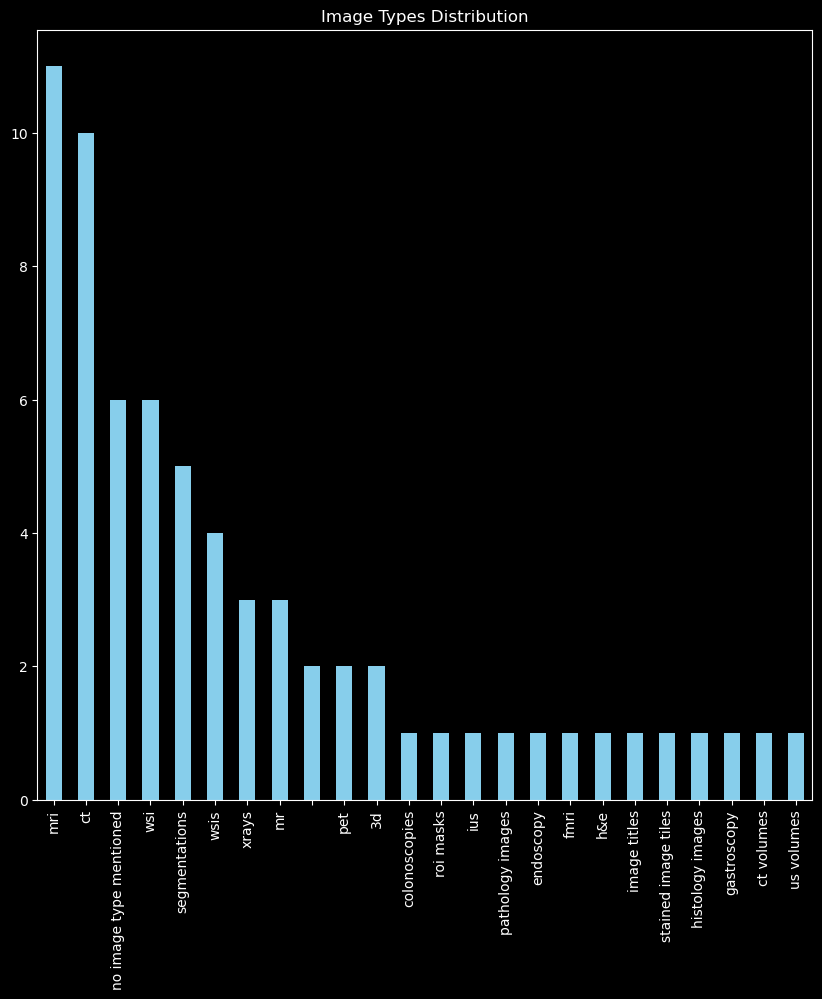

In [344]:
image_type_counts.plot(kind='bar', figsize=(10, 10), color='skyblue', title='Image Types Distribution')

### Organ types

The list of organs from the annotations are divided into main categories of the body, based on anatomical regions and organ systems.
***

**No Organ Mentioned:** 
- Captures the explicit mention of "no organ mentioned".

| **Categories** | **Cranial/Head and Neck** | **Thoracic/Chest** | **Abdominal** | **Female Reproductive System** |
|:---:|:---:|:---:|:---:|:---:|
| Includes | organs located in the head and neck region | the heart, lungs, esophagus, and trachea | liver, spleen, stomach, pancreas, gallbladder, small and large bowel, and various sections of the intestine (duodenum) | organs related to female reproductive functions, including the cervix and uterus |
| **Categories** | **Skeletal System** | **Skin and Breast** | **Pelvic** | **Male Reproductive System** |
| Includes | the spinal cord, mandible | skin and breast, as these are specified separately from internal organ systems | colorectal | organs specific to the male reproductive function, such as the penis and prostate |
| **Categories** | **Endocrine System** | **Whole Body** | **Urinary System** | **Lymphatic/Immune System** |
| Includes | glands like the thyroid | terms that refer to the entire body/not specific to one region, such as "whole body" and "cells" | kidneys and other urinary tract structures | lymph nodes |

In [1]:
# Organ types: Adding a new column to the DataFrame with the categorized values
values = ['breast', 'no organ mentioned', 'gastro', 'colorectal', 'chest', 'skin', 'colon', 'lymph nodes', 'skin', 'prostate', 
          'brain', 'kidney', 'liver', 'liver', 'brain', 'cerebral', 'lung', 'cells', 'whole body', 'lung', 'liver', 'spleen', 
          'lung', 'liver', 'gallbladder', 'hepatic vein', 'spleen', 'stomach', 'pancreas', 'liver', 'spleen', 'kidney', 'pancreas', 
          'abdomen', 'large bowel', 'duodenum', 'spinal cord', 'liver', 'spleen', 'small bowel', 'pancreas', 'left kidney', 'right kidney', 
          'stomach', 'gallbladder', 'thorax', 'esophagus', 'trachea', 'left lung', 'right lung', 'heart', 'head', 'neck', 'brainstem', 
          'mandible', 'optical chiasm', 'left optical nerve', 'right optical nerve', 'left parotid', 'right parotid', 'left submandibular gland', 
          'right submandibular gland', 'brain', 'chest', 'pancreas', 'chest', 'head', 'abdomen', 'pelvis', 'colorectal', 'breast', 'colon tissue', 
          'lung', 'breast', 'tissue', 'thyroid', 'chest', 'head', 'neck', 'brain']

categories = {
    "Cranial/Head and Neck"     : ['brain', 'cerebral', 'head', 'neck', 'brainstem', 'mandible', 'optical chiasm', 'left optical nerve', 
                                   'right optical nerve', 'left parotid', 'right parotid', 'left submandibular gland', 'right submandibular gland'],
    "Thoracic/Chest"            : ['chest', 'lung', 'left lung', 'right lung', 'heart', 'thorax', 'esophagus', 'trachea'],
    "Abdominal"                 : ['liver', 'spleen', 'stomach', 'pancreas', 'gallbladder', 'hepatic vein', 'large bowel', 'duodenum', 'small bowel', 
                                   'abdomen', 'colon', 'colon tissue', 'gastro'],
    "Pelvic"                    : ['colorectal', 'pelvis'],
    "Lymphatic/Immune System"   : ['lymph nodes'],
    "Urinary System"            : ['kidney', 'left kidney', 'right kidney'],
    "Skeletal System"           : ['spinal cord'],
    "Skin and Breast"           : ['skin', 'breast'],
    "Endocrine System"          : ['thyroid'],
    "Whole Body/Systemic"       : ['cells', 'whole body', 'tissue'],
    "Male Reproductive System"  : ['penis', 'prostate'],
    "Female Reproductive System": ['cervix', 'uterus'],
    'No Organ Mentioned'        : ['no organ mentioned']
}

# Function to categorize each value and return the set of categories
def categorize_row(row):
    # Split the row by comma and strip spaces
    image_types = [x.strip() for x in row.split(',')]
    # Initialize a set to hold unique categories for this row
    row_categories = set()
    for image_type in image_types:
        # Check each category for a match and add to the set
        for category, types in categories.items():
            if image_type in types:
                row_categories.add(category)
                break
    # Return a comma-separated string of unique categories or a single category
    return ', '.join(row_categories) if row_categories else 'Uncategorized'

# Apply the categorization function to each row in the DataFrame
df['organ_category'] = df['organ/body part'].apply(categorize_row)

NameError: name 'df' is not defined

### Image types
***

The list of image types from the annotations are divided into main categories of the body, based on the imaging technique, purpose, or the type of information they provide


| **Category** | **Subcategory** | **Examples** |
|---|---|---|
| **Radiology** | MRI (Magnetic Resonance Imaging) | 'mri', 'mr' |
|  | CT (Computed Tomography) | 'ct', 'ct volumes' |
|  | X-rays | 'xrays' |
|  | Ultrasound | 'us volumes', 'ius' |
|  | PET (Positron Emission Tomography) | 'pet' |
|  | fMRI (Functional MRI) | 'fmri' |
| **Endoscopy** | General Endoscopy | 'endoscopy' |
|  | Gastroscopy | 'gastroscopy' |
|  | Colonoscopies | 'colonoscopies' |
| **Pathology** | Pathology Images | 'pathology images' |
|  | Histology Images | 'histology images', 'h&e', 'stained image tiles' |
|  | WSI (Whole Slide Imaging) | 'wsi', 'wsis' |
| **Imaging Processing and Analysis** | Segmentations | 'segmentations' |
|  | ROI Masks (Region of Interest Masks) | 'roi masks' |
| **Miscellaneous** | 3D Imaging | '3d' |
|  | Image Titles | 'image titles' |
|  | No Image Type Mentioned | 'no image type mentioned' |


In [346]:
# Image types: Adding a new column to the new DataFrame with the categorized values 
# Function to categorize values

# Categories dictionary
categories = {
    "Radiology": ['mri', 'mr', 'ct', 'xrays', 'fmri'],
    "Endoscopy": ['gastroscopy', 'endoscopy'],
    "Pathology": ['pathology images', 'h&e', 'histology images', 'stained image tiles'],
    "Imaging Processing and Analysis": ['roi masks', 'segmentations'],
    "Miscellaneous": ['3d', 'image titles', 'no image type mentioned'],
    "Whole Slide Imaging": ['wsi', 'wsis'],
    "Ultrasound": ['us volumes', 'ius'],
    "PET": ['pet']
}

# Function to categorize each value and return the set of categories
def categorize_row(row):
    # Split the row by comma and strip spaces
    image_types = [x.strip() for x in row.split(',')]
    # Initialize a set to hold unique categories for this row
    row_categories = set()
    for image_type in image_types:
        # Check each category for a match and add to the set
        for category, types in categories.items():
            if image_type in types:
                row_categories.add(category)
                break
    # Return a comma-separated string of unique categories or a single category
    return ', '.join(row_categories) if row_categories else 'Uncategorized'

# Apply the categorization function to each row in the DataFrame
df['image_category'] = df['image type'].apply(categorize_row)
df.drop(columns=['organ/body part', 'image type'], inplace=True)
df.head()

,title,age,gender,ethnicity,geolocation,dataset info,no. datasets,public dataset(s),private data(s),bias,algorithm bias,data bias,sub type of data bias,technical bias,organ_category,image_category
0,A Texture Neural Network to Predict the Abnorm...,0,0,0,1,"following irb approval for this study, we sear...",1,0,0,0,0,0,0,0,Skin and Breast,"Radiology, Imaging Processing and Analysis"
1,An AI-Ready Multiplex Staining Dataset for Rep...,0,0,0,0,we release the first denovo mif/mihc stained d...,0,0,0,0,0,0,0,0,No Organ Mentioned,Miscellaneous
2,An Anti-biased TBSRTC-Category Aware Nuclei Se...,0,0,0,0,"image dataset.', 'we construct a clinical thyr...",0,0,0,1,0,0,0,1,No Organ Mentioned,Miscellaneous
3,atTRACTive: Semi-automatic White Matter Tract ...,0,0,0,0,the method is implemented as the tool attracti...,0,0,0,0,0,0,0,0,No Organ Mentioned,Miscellaneous
4,Automatic Bleeding Risk Rating System of Gastr...,0,0,0,1,this may cause inconsistency or even misdiagno...,1,1,0,0,0,0,0,0,Abdominal,Endoscopy


### Demographics
***

This code adds a new column demographics_usage to the dataframe, categorizing each paper based on how extensively it uses demographic information according to a criteria. This approach provides a clear, easy-to-understand categorization based on the presence and count of demographic information in the dataset descriptions.

**Criteria**

To aggregate the counts of demographics across four columns (age, gender, ethnicity, geolocation) into one category (demographics) with levels indicating the extent of demographics usage in papers, I have created 3 different categories:

1. No Demographic Data: For papers that do not use demographic information at all.
2. Limited Use of Demographic Data: For papers that use some demographic information, indicating a moderate level of usage.
3. Extensive Use of Demographic Data: For papers that use a lot of demographic information, indicating a high level of usage.

In [361]:
# Define the aggregation function
def aggregate_demographics(row):
    # Count the number of demographic indicators used (sum of 1s across the 4 columns)
    count = row['age'] + row['gender'] + row['ethnicity'] + row['geolocation']
    if count == 0:
        return 'No Demographic Data'
    elif 1 <= count <= 2:
        return 'Limited Use of Demographic Data'
    else:
        return 'Extensive Use of Demographic Data'

# Apply the function across each row
#df['demographics_usage'] = df.apply(aggregate_demographics, axis=1)
#df[['title', 'age', 'gender', 'ethnicity', 'geolocation', 'demographics_usage']].head() # Preview the updated DataFrame
#df.drop(columns=['age', 'gender', 'ethnicity', 'geolocation'], inplace=True) # Drop the individual columns
#df.to_csv('/Users/yasminsarkhosh/Documents/GitHub/machine-learning-bsc-thesis-2024/outputs/annotation_data/processed_50_papers_annotations.csv')

### Bias types
***

By categorizing bias-related sentences into these four broad categories to capture the spectrum of bias acknowledgment and oversight within research papers. This structure allows for distinguishing between papers that proactively address bias, those that discuss bias in a neutral or theoretical context, and those that neglect to address bias adequately.


1. Bias Mentioned: 
Marking any mention of bias without delving into the specifics of its nature or impact.

2. Positive Bias Acknowledgment:
Highlights sentences where bias is not only identified but also addressed or mitigated in a constructive manner.

3. Neutral/Indifferent Bias Mention:
Focus' on discussions about bias that are more exploratory or theoretical without a clear positive or negative stance. It also covers instances where bias is mentioned in passing or as part of a broader discussion without explicit acknowledgment or action.

4. Negative Bias Oversight:
Emphasizes sentences that indicate a failure to recognize, address, or adequately discuss significant biases, suggesting a lack of awareness or potentially a deliberate omission.


In [459]:
# test with the old categories for bias
df = pd.read_csv('/Users/yasminsarkhosh/Documents/GitHub/machine-learning-bsc-thesis-2024/outputs/annotation_data/processed_50_papers_bias.csv', delimiter=";",header=0).fillna(0)
df.drop(columns=['bias mentioned sentence', 'data bias sentence'], inplace=True)
df['bias mentioned'] = df['bias mentioned'].astype('int')

,Column1,title,dataset info,no. datasets,bias mentioned,algorithm bias,sub type algorithm bias,data bias,sub type of data bias,technical bias,organ_category,image_category,demographics_usage,dataset_disclosure_category
0,0,A Texture Neural Network to Predict the Abnorm...,"following irb approval for this study, we sear...",1,0,0,0,0,0,0,Skin and Breast,"Radiology, Imaging Processing and Analysis",Limited Use of Demographic Data,No Undisclosure Information
1,1,An AI-Ready Multiplex Staining Dataset for Rep...,we release the first denovo mif/mihc stained d...,0,0,0,0,0,0,0,No Organ Mentioned,Miscellaneous,No Demographic Data,No Mentions of Datasets
2,2,An Anti-biased TBSRTC-Category Aware Nuclei Se...,"image dataset.', 'we construct a clinical thyr...",0,1,0,0,0,0,1,No Organ Mentioned,Miscellaneous,No Demographic Data,No Mentions of Datasets
3,3,atTRACTive: Semi-automatic White Matter Tract ...,the method is implemented as the tool attracti...,0,0,0,0,0,0,0,No Organ Mentioned,Miscellaneous,No Demographic Data,No Mentions of Datasets
4,4,Automatic Bleeding Risk Rating System of Gastr...,this may cause inconsistency or even misdiagno...,1,0,0,0,0,0,0,Abdominal,Endoscopy,Limited Use of Demographic Data,Full Disclosure


In [461]:
def categorize_bias(row):
    bias_columns = ['algorithm bias', 'data bias ', 'technical bias']
    # Count the number of bias types mentioned
    bias_count = sum(row[col] > 0 for col in bias_columns)
    
    if bias_count == 0 and row['bias mentioned'] == 0:
        return 'No Bias Mentioned'
    elif row['data bias '] > 0 and bias_count == 1:
        return 'Data Bias Only' if row['sub type of data bias'] == 0 else 'Specific Data Bias Mentioned'
    elif row['algorithm bias'] > 0 and bias_count == 1:
        return 'Algorithm Bias Only'
    elif row['technical bias'] > 0 and bias_count == 1:
        return 'Technical Bias Only'
    elif bias_count > 1:
        return 'Multiple Biases Mentioned'
    else:
        return 'Uncategorized'  # Fallback for any case not explicitly covered

# Apply the categorization function
df['bias_category'] = df.apply(categorize_bias, axis=1)

# Display the DataFrame with the new bias category
df[['title', 'bias mentioned', 'algorithm bias', 'data bias ', 'technical bias', 'bias_category']]
#df.to_csv('/Users/yasminsarkhosh/Documents/GitHub/machine-learning-bsc-thesis-2024/outputs/annotation_data/df_processed_50_papers_complete.csv')

,title,bias mentioned,algorithm bias,data bias,technical bias,bias_category
0,A Texture Neural Network to Predict the Abnorm...,0,0,0,0,No Bias Mentioned
1,An AI-Ready Multiplex Staining Dataset for Rep...,0,0,0,0,No Bias Mentioned
2,An Anti-biased TBSRTC-Category Aware Nuclei Se...,1,0,0,1,Technical Bias Only
3,atTRACTive: Semi-automatic White Matter Tract ...,0,0,0,0,No Bias Mentioned
4,Automatic Bleeding Risk Rating System of Gastr...,0,0,0,0,No Bias Mentioned
5,Centroid-Aware Feature Recalibration for Cance...,0,0,0,0,No Bias Mentioned
6,Certification of Deep Learning Models for Medi...,0,0,0,0,No Bias Mentioned
7,Detecting Domain Shift in Multiple Instance Le...,0,0,0,0,No Bias Mentioned
8,Detection of Basal Cell Carcinoma in Whole Sli...,1,0,0,0,Uncategorized
9,Dice Semimetric Losses: Optimizing the Dice Sc...,1,0,0,1,Technical Bias Only


### Datasets
***

1. Full Disclosure: All datasets are accounted for as either public or private.
2. Partial Disclosure: Some datasets are mentioned as public or private, but not all (the total number of datasets exceeds the sum of public and private ones mentioned)
3. No Disclosure: datasets are not mentioned as public or private, or the status of all datasets is undisclosed. 
4. No Mentions of Datasets: The sentence extraction does not provide any information of whether the datasets are private and/or public

In [434]:
df = pd.read_csv('/Users/yasminsarkhosh/Documents/GitHub/machine-learning-bsc-thesis-2024/outputs/annotation_data/processed_50_papers_annotations_2.csv', delimiter=';', header=0)
df['public  dataset(s)'] = df['public  dataset(s)'].fillna('Dataset Status Undisclosed')
df['private data(s)'] = df['private data(s)'].fillna('Dataset Status Undisclosed')

df.head()

,Column1,title,dataset info,no. datasets,public dataset(s),private data(s),bias mentioned,bias mentioned sentence,algorithm bias,data bias,data bias sentence,sub type of data bias,technical bias,organ_category,image_category,demographics_usage
0,0,A Texture Neural Network to Predict the Abnorm...,"following irb approval for this study, we sear...",1,Dataset Status Undisclosed,Dataset Status Undisclosed,NaN,0,0,0,NaN,0,0,Skin and Breast,"Radiology, Imaging Processing and Analysis",Limited Use of Demographic Data
1,1,An AI-Ready Multiplex Staining Dataset for Rep...,we release the first denovo mif/mihc stained d...,0,0.0,0.0,NaN,0,0,0,NaN,0,0,No Organ Mentioned,Miscellaneous,No Demographic Data
2,2,An Anti-biased TBSRTC-Category Aware Nuclei Se...,"image dataset.', 'we construct a clinical thyr...",0,0.0,0.0,NaN,1,0,0,NaN,0,1,No Organ Mentioned,Miscellaneous,No Demographic Data
3,3,atTRACTive: Semi-automatic White Matter Tract ...,the method is implemented as the tool attracti...,0,0.0,0.0,NaN,0,0,0,NaN,0,0,No Organ Mentioned,Miscellaneous,No Demographic Data
4,4,Automatic Bleeding Risk Rating System of Gastr...,this may cause inconsistency or even misdiagno...,1,0.0,1.0,NaN,0,0,0,NaN,0,0,Abdominal,Endoscopy,Limited Use of Demographic Data


In [435]:
# Function to categorize dataset disclosure based on the comparison
def categorize_disclosure(row):
    # Handle the case where no datasets are used
    if row['no. datasets'] == 0:
        return 'No Mentions of Datasets'
    
    # Convert public and private dataset counts to numeric, setting errors to NaN for non-numeric values
    public_count = pd.to_numeric(row['public  dataset(s)'], errors='coerce')
    private_count = pd.to_numeric(row['private data(s)'], errors='coerce')
    
    # Check for full disclosure
    if not np.isnan(public_count) and not np.isnan(private_count) and (public_count + private_count == row['no. datasets']):
        return 'Full Disclosure'
    elif (public_count + private_count < row['no. datasets']):
        # This condition handles partial or no disclosure
        return 'Partial Disclosure'
    elif row['public  dataset(s)'] == 'Dataset Status Undisclosed' and row['private data(s)'] == 'Dataset Status Undisclosed':
        return 'No Undisclosure Information'
    else:
        return 'Partial Disclosure'  # Fallback case

# Apply the function to each row
df['dataset_disclosure_category'] = df.apply(categorize_disclosure, axis=1)

# Display the DataFrame with the new disclosure category
df[['title', 'no. datasets', 'public  dataset(s)', 'private data(s)', 'dataset_disclosure_category']]
df.drop(columns=['public  dataset(s)', 'private data(s)', 'Column1'], inplace=True)
df.head()
#df.to_csv('/Users/yasminsarkhosh/Documents/GitHub/machine-learning-bsc-thesis-2024/outputs/annotation_data/processed_50_papers_annotations_2.csv')

,title,dataset info,no. datasets,bias mentioned,bias mentioned sentence,algorithm bias,data bias,data bias sentence,sub type of data bias,technical bias,organ_category,image_category,demographics_usage,dataset_disclosure_category
0,A Texture Neural Network to Predict the Abnorm...,"following irb approval for this study, we sear...",1,NaN,0,0,0,NaN,0,0,Skin and Breast,"Radiology, Imaging Processing and Analysis",Limited Use of Demographic Data,No Undisclosure Information
1,An AI-Ready Multiplex Staining Dataset for Rep...,we release the first denovo mif/mihc stained d...,0,NaN,0,0,0,NaN,0,0,No Organ Mentioned,Miscellaneous,No Demographic Data,No Mentions of Datasets
2,An Anti-biased TBSRTC-Category Aware Nuclei Se...,"image dataset.', 'we construct a clinical thyr...",0,NaN,1,0,0,NaN,0,1,No Organ Mentioned,Miscellaneous,No Demographic Data,No Mentions of Datasets
3,atTRACTive: Semi-automatic White Matter Tract ...,the method is implemented as the tool attracti...,0,NaN,0,0,0,NaN,0,0,No Organ Mentioned,Miscellaneous,No Demographic Data,No Mentions of Datasets
4,Automatic Bleeding Risk Rating System of Gastr...,this may cause inconsistency or even misdiagno...,1,NaN,0,0,0,NaN,0,0,Abdominal,Endoscopy,Limited Use of Demographic Data,Full Disclosure


### Data Viz 1)
***

In [479]:
#df.drop(columns=['algorithm bias', 'data bias ', 'technical bias', 'bias mentioned', 'sub type algorithm bias','sub type of data bias' ], inplace=True)
#df.to_csv('/Users/yasminsarkhosh/Documents/GitHub/machine-learning-bsc-thesis-2024/outputs/annotation_data/df_processed_50_papers_complete_cleaned.csv')

#### Data Viz 2)
***

In [482]:
# Load the dataframe
df = pd.read_csv('/Users/yasminsarkhosh/Documents/GitHub/machine-learning-bsc-thesis-2024/outputs/annotation_data/df_processed_50_papers_complete_cleaned.csv', index_col=0)
df.drop(columns=['Column1'], inplace=True)
df.head()

,title,dataset info,no. datasets,organ_category,image_category,demographics_usage,dataset_disclosure_category,bias_category
0,A Texture Neural Network to Predict the Abnorm...,"following irb approval for this study, we sear...",1,Skin and Breast,"Radiology, Imaging Processing and Analysis",Limited Use of Demographic Data,No Undisclosure Information,No Bias Mentioned
1,An AI-Ready Multiplex Staining Dataset for Rep...,we release the first denovo mif/mihc stained d...,0,No Organ Mentioned,Miscellaneous,No Demographic Data,No Mentions of Datasets,No Bias Mentioned
2,An Anti-biased TBSRTC-Category Aware Nuclei Se...,"image dataset.', 'we construct a clinical thyr...",0,No Organ Mentioned,Miscellaneous,No Demographic Data,No Mentions of Datasets,Technical Bias Only
3,atTRACTive: Semi-automatic White Matter Tract ...,the method is implemented as the tool attracti...,0,No Organ Mentioned,Miscellaneous,No Demographic Data,No Mentions of Datasets,No Bias Mentioned
4,Automatic Bleeding Risk Rating System of Gastr...,this may cause inconsistency or even misdiagno...,1,Abdominal,Endoscopy,Limited Use of Demographic Data,Full Disclosure,No Bias Mentioned


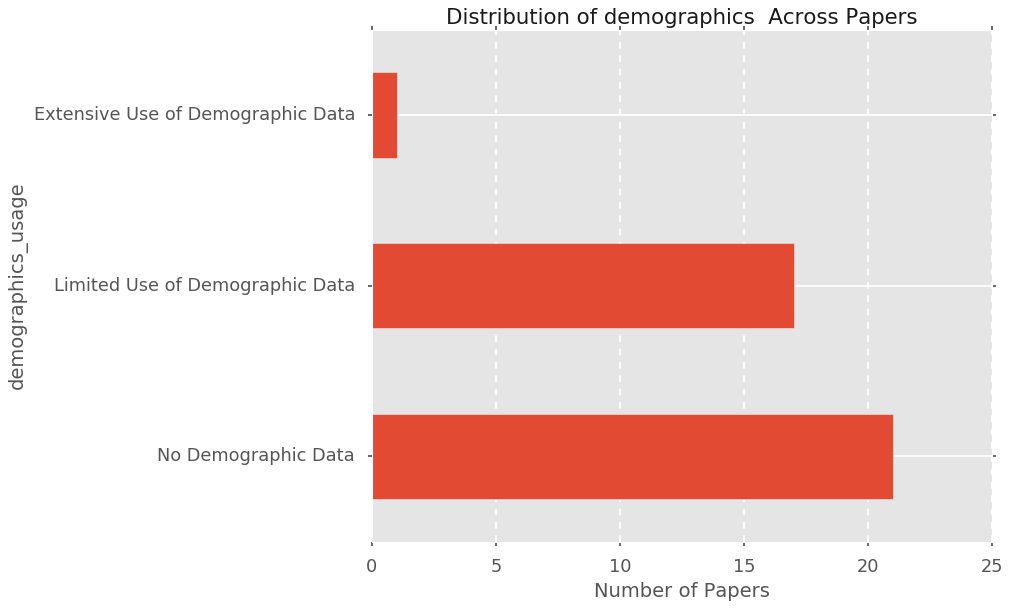

In [591]:
# Organ category distribution
organ_counts = df['demographics_usage'].value_counts()

# Horizontal bar chart
plt.figure(figsize=(10, 8))
organ_counts.plot(kind='barh')
plt.title('Distribution of demographics  Across Papers')
plt.xlabel('Number of Papers')
plt.ylabel('demographics_usage')
plt.grid(axis='x', linestyle='--')
plt.show()


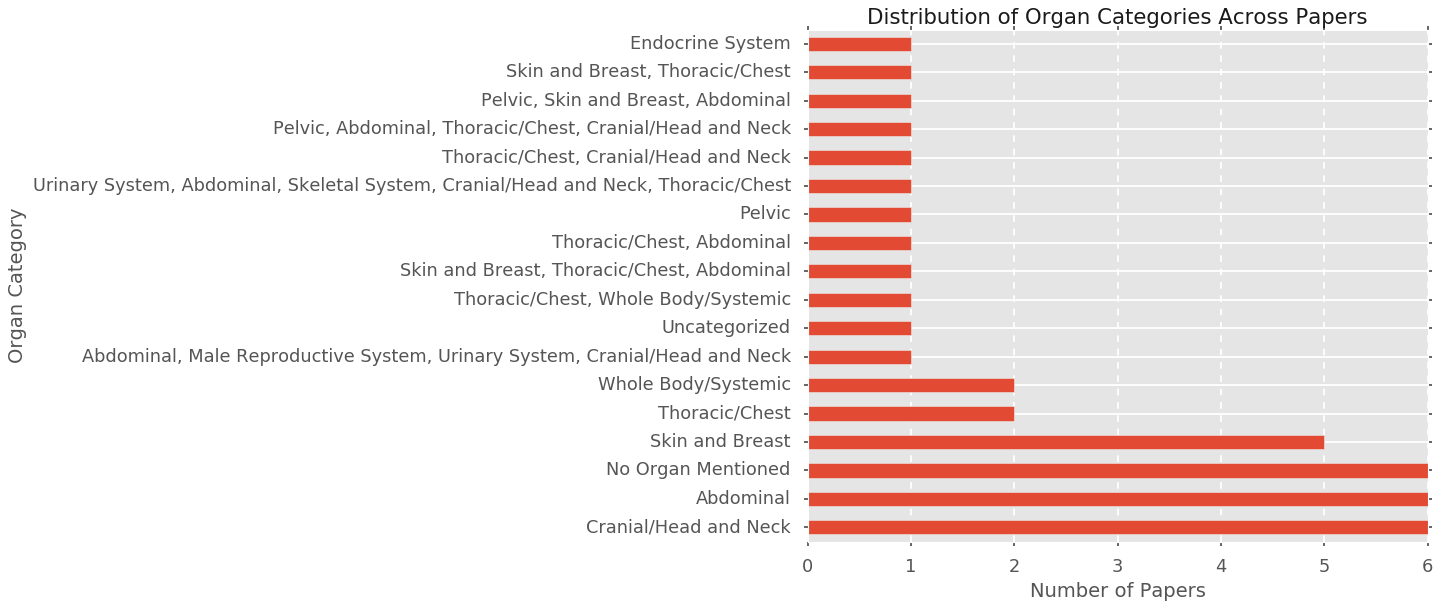

In [586]:
# Organ category distribution
organ_counts = df['organ_category'].value_counts()

# Horizontal bar chart
plt.figure(figsize=(10, 8))
organ_counts.plot(kind='barh')
plt.title('Distribution of Organ Categories Across Papers')
plt.xlabel('Number of Papers')
plt.ylabel('Organ Category')
plt.grid(axis='x', linestyle='--')
plt.show()


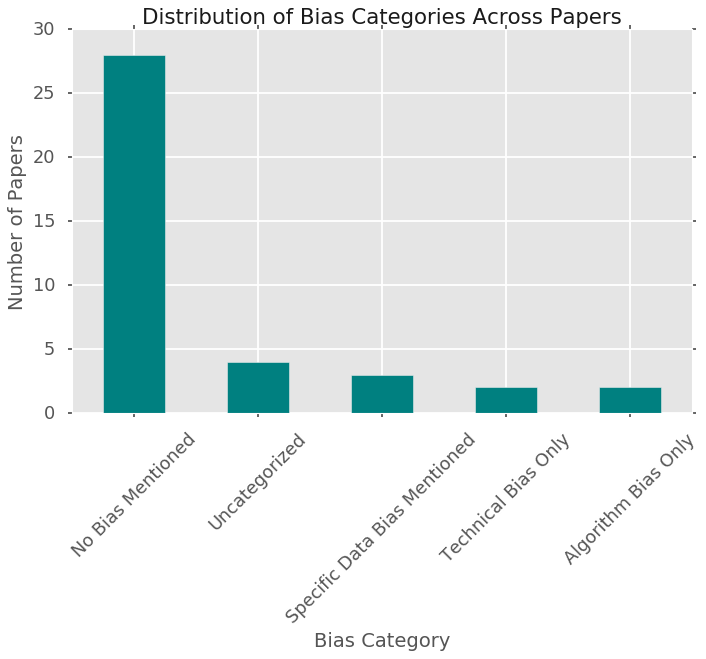

In [589]:
bias_category_counts = df['bias_category'].value_counts()

plt.figure(figsize=(10, 6))
bias_category_counts.plot(kind='bar', color='teal')
plt.title('Distribution of Bias Categories Across Papers')
plt.xlabel('Bias Category')
plt.ylabel('Number of Papers')
plt.xticks(rotation=45)
plt.show()

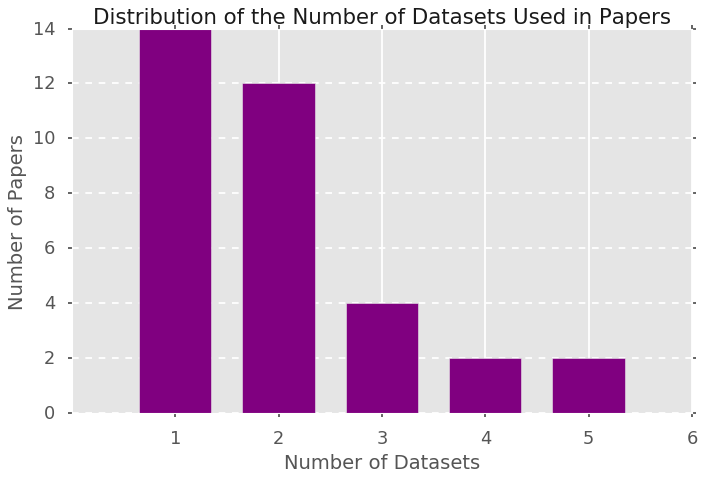

In [590]:
plt.figure(figsize=(10, 6))
df['no. datasets'].hist(bins=range(1, df['no. datasets'].max() + 1), align='left', rwidth=0.7, color='purple')
plt.title('Distribution of the Number of Datasets Used in Papers')
plt.xlabel('Number of Datasets')
plt.ylabel('Number of Papers')
plt.xticks(range(1, df['no. datasets'].max() + 1))
plt.grid(axis='y', linestyle='--')
plt.show()

### Data Visualisations
***

In [260]:
import seaborn as sns